# Lecture 4. Linear Regression

## Machine learning
- Statistical thinking
- Algorithm, optimization
- Data
=> Results 
=> Interpretation

### This course is
- to introduce the fundamental vocabulary and concepts of ML
- to introduce the Scikit-Learn API and show some examples of its use
- to dive into the details of several of the most important ML approaches
    * linear models: regression, classification
    * tree models: decision tree, random forest, XGboost
    * SVM, ...

### This course is NOT
- to cover all machine learning foundation and techniques
- a comprehensive manual for the use of the Scikit-Learn package

### Types of machine learning

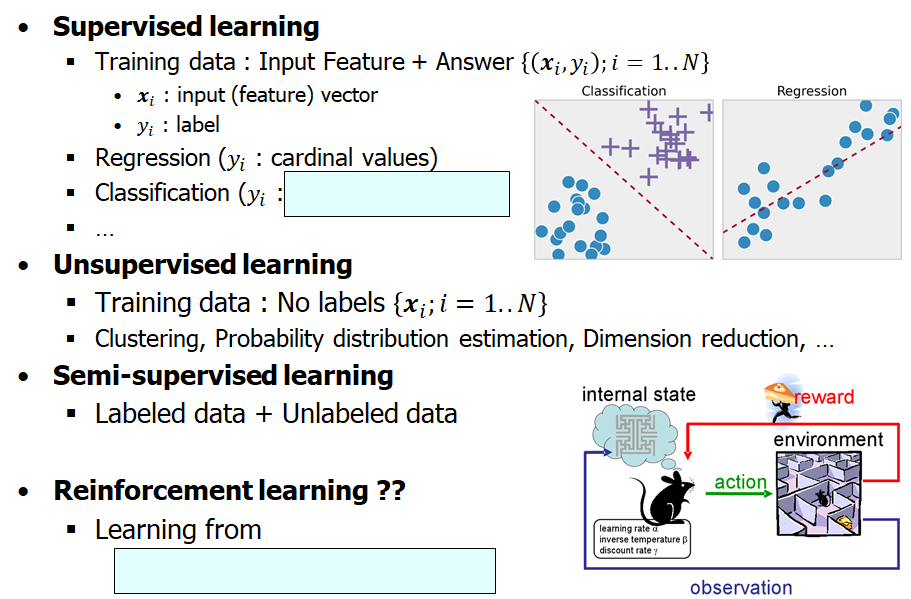

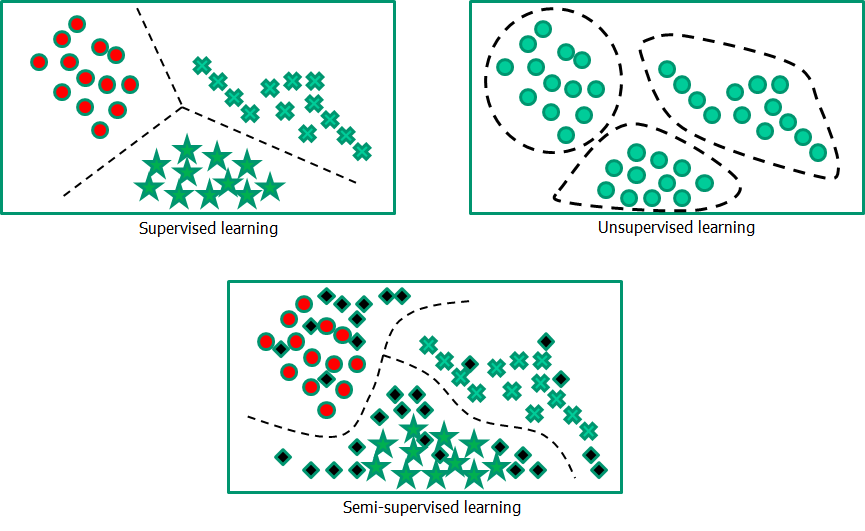

### In this course, we will learn 
- basic concepts of machine learning and data science thru
- regression and classification
- various models
- optimization methods

## 4-1. Simple Linear Regression

### 4-1-1. Synthetic data with random noise
- $ y = f(x) + \epsilon $
    * $ f(x)=2\log x + 5 $
- $ \epsilon \sim N(0, 10^2) $
- $ x_i \sim U(0,10), i=0,...,N=49 $

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
def true_func(x):
    y = 2*np.log(x) + 5
    return y

def generate_data(n):
    x = 10 * np.random.random(size=(n,1))
    y = true_func(x) + 0.5*np.random.randn(n,1)
    return x, y

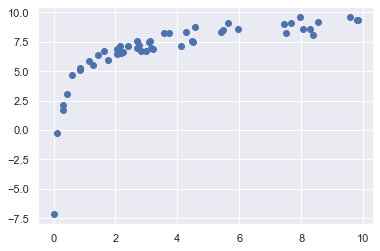

In [5]:
x, y = generate_data(50)
plt.scatter(x, y);

### 4-1-2. How to solve simple linear regression?  Least square
- linear regression model
- $ y_i = w_0 + w_1x_i + \epsilon_i = \mathbf{x}_i^T \mathbf{w} + \epsilon_i $ 
    * where $ \mathbf{w} = (w_0, w_1)^T $ 
    * and $ \mathbf{x}_i = (1, x_i)^T $
- to find $ \mathbf{w} = (w_0, w_1)^T $ which minimizes
    * $ L(\mathbf{w}) = \sum_{i=1}^{N} \epsilon_i^2 = \sum_{i=1}^{N} {(\mathbf{x}_i^T \textbf{w} - y_i)^2} $ 
- in matrix form
    * $ X = \begin{bmatrix}\mathbf{x}_1\\:\\\mathbf{x}_N\\\end{bmatrix}
         = \begin{bmatrix}1 & x_1\\:&:\\1 & x_N\\\end{bmatrix}, 
        Y = \begin{bmatrix}y_1\\:\\y_N\\\end{bmatrix} $
    * min $ L(\mathbf{w}) = (Y-X\mathbf{w})^2 $
    
- solving linear regression model : __least square__ (a.k.a. OLS)
    * $ \frac{\partial L}{\partial \mathbf{w}} = -2X^T(Y-X\mathbf{w}) = 2X^TX\mathbf{w} - 2X^TY= 0 $
    * $ X^TX\mathbf{w}=X^TY$  
    * $ \mathbf{w} = (X^TX)^{-1}X^TY $
    * $ \mathbf{w} = X^+Y$, where $X^+ = (X^TX)^{-1}X^T $
        * $ X^+ $ : Pseudo-inverse (Moore-Penrose inverse)

In [5]:
ones = np.ones(x.shape)
x1 = np.concatenate([ones,x], axis=1)
xpinv = np.linalg.pinv(x1)
w = np.matmul(xpinv, y).reshape(-1)
print (f"from least square: w0={w[0]}, w1={w[1]}")

from least square: w0=4.270109004676782, w1=0.6282653175866545


### 4-1-3. Using Scikit-Learn for simple linear regression
- __select model__
    * sklearn.linear_model.LinearRegression
        * of course, there are many more models in sklearn
        * SVM, Tree models, ...
- __prepare data__
    * reshape data as a matrix of shape (n_samples, n_features)
        * no 1's are required
- __fit model__ (= train, learn)
    * model.fit()
    * check result
- __test__ (= predict)
    * model.predict()

#### __select model__ 
- We will use simple linear regression

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

#### __prepare training data__ : features and labels
- X : __feature matrix__
    * shape = <font color="red">TAQ</font>[<font color="white"> (n_samples, n_features) </font>]
    * no 1's are required
- Y : __target vector__ (= __label vector__)
    * shape = (n_samples,)

![](figures/05.02-samples-features.png)

- Spliting data : training data + validation date + test data
    * Data __available__ for developing model
        * $D_{train}=(X_{train}, Y_{train})$ : for fitting the model
        * $D_{val}=(X_{val}, Y_{val})$ : for validating the model
            - a.k.a. 'dev. set', 'validation set'
            - used for model selection or hyperparameter tuning
        * $D_{test}=(X_{test}, Y_{test})$ : for checking model performance internally
            * $D_{val}$ and $D_{test}$ are often used interchangeably
    * Data __unavailble__ to model developer
        * $D_{exam}=(X_{exam}, Y_{exam})$ : for examining the model externally
            * $D_{exam}$ is sometimes called _external test data_

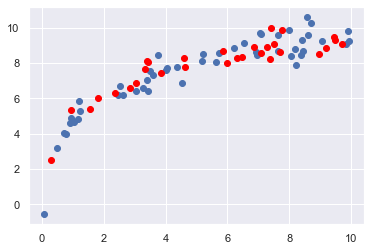

In [7]:
# X_train, Y_train = generate_data(50)
X_train, Y_train = x, y  # generated in a previous cell
plt.scatter(X_train, Y_train)

X_val, Y_val = generate_data(30)
plt.scatter(X_val, Y_val, c='red');

#### __fit__ the model to your data
- model fitting = model training = parameter learning
- to find the best model parameters
    * $w_0$ = model.intercept_
    * $w_1$ = model.coef_

In [8]:
model.fit(X_train, Y_train)
print (f"from sklearn     : w0={model.intercept_}, w1={model.coef_}")
print (f"from least square: w0={w[0]}, w1={w[1]}")

from sklearn     : w0=[4.270109], w1=[[0.62826532]]
from least square: w0=4.270109004676782, w1=0.6282653175866545


#### __predict__ labels for validation data
- X_val : validation data
- Y_val : label data for X_val
- Yhat_val : predicted value for X_val

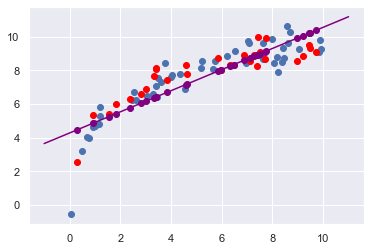

In [9]:
plt.scatter(X_train, Y_train)  # plot training data
plt.scatter(X_val, Y_val, c='red')  # plot test data

Yhat_val = model.predict(X_val)
plt.scatter(X_val, Yhat_val, c='purple')  # plot predicted values

X_range = np.array([-1,11]).reshape(-1,1)
Yhat_range = model.predict(X_range)
plt.plot(X_range, Yhat_range, c='purple');

## 4-2. Evaluating model performance (score)

### 4-2-1. MSE, RMSE, MAE, MAPE

- MSE (Mean Squared Error)
    * $\text{MSE} = \frac{1}{N}\sum_{i=1}^{N} {(\hat{y}_i - y_i)^2} $ 
    * $\text{SSE} = \sum_{i=1}^{N} {(\hat{y}_i - y_i)^2} = N\cdot\text{MSE}$ 

- RMSE (Root Mean Squared Error)
    * $\text{RMSE} = \sqrt{\text{MSE}}$
- MAE (Mean Absolute Error)
    * $\text{MAE} = \frac{1}{N}\sum_{i=1}^{N} {|\hat{y}_i - y_i|} $ 
- MAPE (Mean Absolute Percentage Error)
    * $\text{MAPE} = \frac{1}{N}\sum_{i=1}^{N} \frac{|\hat{y}_i - y_i|}{y_i} $

### 4-2-2. $R^2$ : Coefficient of Determination

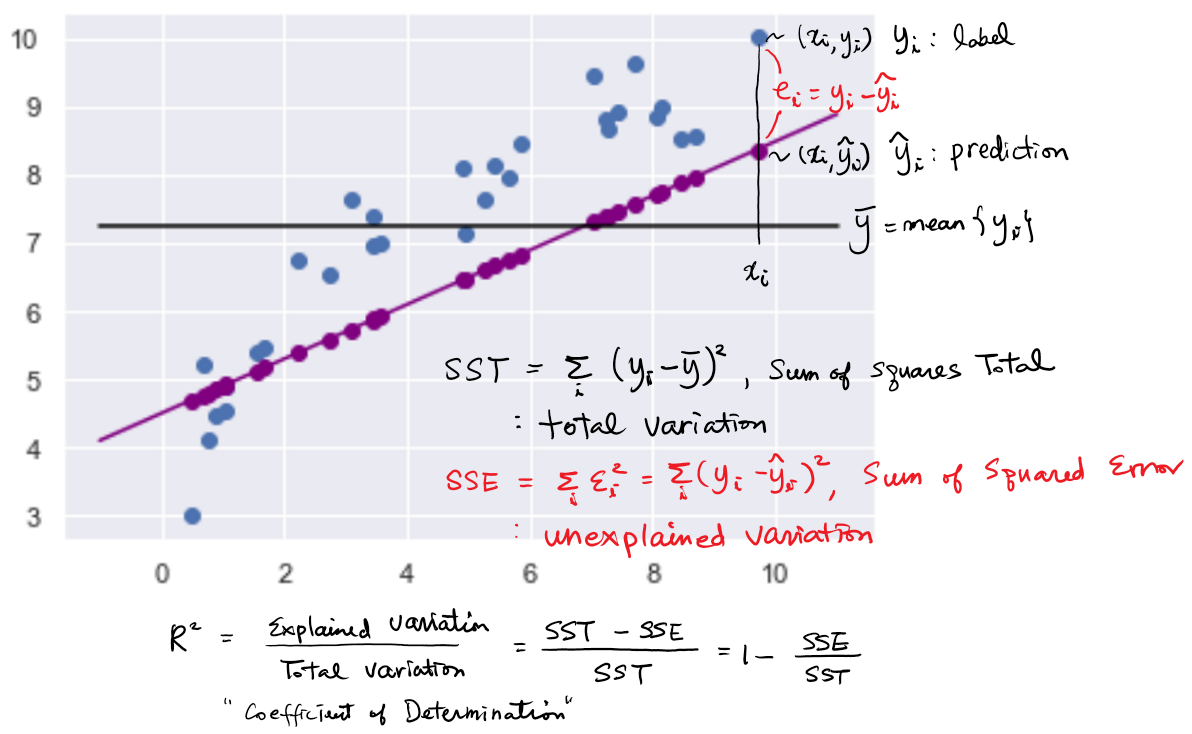

In [10]:
Yhat_train = model.predict(X_train)
SST = ((Y_train - Y_train.mean())**2).sum()
SSE = ((Y_train - Yhat_train)**2).sum()
R2_train = 1 - SSE/SST
print (f'SST={SST}\nSSE={SSE}\ntrain R^2={R2_train}')

SST=229.67798396938838
SSE=53.27092384399691
train R^2=0.7680625590518206


In [11]:
R2_train = model.score(X_train, Y_train)
print (f'train R^2={R2_train}')

train R^2=0.7680625590518206


In [12]:
# another method
from sklearn.metrics import r2_score
R2_train = r2_score(Y_train, Yhat_train)
print (f'train R^2={R2_train}')

train R^2=0.7680625590518206


### 4-2-3. Train $R^2$ vs validation $R^2$
- $R^2_{train}$ : computed from $Y_{train}$ and $\hat{Y}_{train}$
- $R^2_{val}$ : computed from $Y_{val}$ and $\hat{Y}_{val}$
- $R^2_{train} \geq R^2_{val} $?
    * <font color="red">TAQ</font>[<font color="white"> usually __true__, but not always </font>]
        * since model fits $D_{train}$ by minimizing $\text{SSE}_{train}$
        * in a lucky day, $D_{val}$ can be closer to the fitted model    

In [13]:
R2_val = model.score(X_val, Y_val)
print (f'val R^2={R2_val}')

val R^2=0.6656457820781843


#### Range of $R^2$
- $0 \leq R^2_{train} \leq 1 ? \to $  <font color="red">TAQ</font>[<font color="white"> __true__</font>]
    * $R^2_{train} \leq 1$ since $\text{SSE}_{train} \geq 0$ alwasys
    * $\text{SST}_{train} \geq \text{SSE}_{train} \to R^2_{train} \geq 0 $
        * true for all linear regression with intercept($w_0$)
            * by setting $w_i = 0$ for $i>0$, we get $w_0 = \bar{y}$
        * it is not guaranteed if some absurd model is used
<br>  
- $0 \leq R^2_{val} \leq 1 ? \to $  <font color="red">TAQ</font>[<font color="white"> __not always__</font>]
    * $R^2_{val} \leq 1$ since $\text{SSE}_{val} \geq 0$ alwasys
    * $\text{SST}_{val} \geq \text{SSE}_{val}$ is __NOT__ guaranteed
        * So, $R^2_{val}$ can be negative
- We will see this in the next section

In [14]:
stupid_model = LinearRegression(fit_intercept = False)
stupid_model.fit(X_train, Y_train)
print (f'train R^2={stupid_model.score(X_train, Y_train)}')

train R^2=-0.23441173722250896


## 4-3. Polynomial regression
- simple linear regression
    * $ y_i = w_0 + w_1x_i + \epsilon_i = \textbf{x}_i^T \textbf{w} + \epsilon_i $ 
        * $ \textbf{x}_i = (1, x_i)^T $ : features
        * $ \textbf{w} = (w_0, w_1)^T $ : parameters
- regression with polynomial of degree p
    * $ y_i = w_0 + w_1x_i + w_2x_i^2 + ... + w_px_i^p + \epsilon_i = \textbf{x}_i^T \textbf{w} + \epsilon_i $ 
        * $ \textbf{x}_i = (1, x_i, x_i^2,..., x_i^p)^T $ : polynomial features
        * $ \textbf{w} = (w_0, w_1, w_2, ..., w_p)^T $ : parameters
    * polynomial regression : linear in parameter vector $ \textbf{w} $

### 4-3-1. Preparing polynomial features
![](figures/polynomial-features.png)

In [15]:
def polynomial_features(X, p):
    X_list= [X]
    for i in range(2,p+1):
        X_list.append(X**i)
    Xp = np.concatenate(X_list, axis=1)
    return Xp

- same can be done by __sklearn.preprocessing.PolynomialFeatures__

In [16]:
from sklearn.preprocessing import PolynomialFeatures
def polynomial_features(X, p):
    poly = PolynomialFeatures(p, include_bias=False)
    Xp = poly.fit_transform(X)
    return Xp

### 4-3-2. Pipelining
- often, a regression task consists of several steps including data prespocessing
- consider the following simple example
    * $x' = \phi(x)$ : feature vector
    * $y = f(x')$ : regression model
- this can be seen as a pipelined function
    * $y = g(x)$, where $g(x) = f\circ\phi(x) = f(\phi(x))$
- use sklearn.pipeline
    * step 1 : Xp = polynomial features (X, p)
    * step 2 : Y = linear regression on Xp
    * model_pipe = make_pipeline(PolynomialFeatures(p), LinearRegression())
        * model_pipe.fit()
        * model_pipe.predict(X)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

model = LinearRegression()
p = 3
model_pipe = make_pipeline(PolynomialFeatures(p), model)

In [18]:
# model fitting
X_train, Y_train = generate_data(10)
model_pipe.fit(X_train, Y_train)

R2_train = model_pipe.score(X_train, Y_train)
print (f'p = {p}, train R^2={R2_train}')

p = 3, train R^2=0.9735644517447588


In [19]:
# model validation
X_val, Y_val = generate_data(10)

R2_val = model_pipe.score(X_val, Y_val)
print (f'p = {p}, val R^2={R2_val}')

p = 3, val R^2=0.3395929421405175


### 4-3-3. Fitting polynomial of degree p
- prepare model and pipeline
- fit
- predict
- compute $R^2$ score : $R^2_{train}$, $R^2_{val}$ 
- plot resulting model

In [20]:
def polynomial_fit(model, p):
    poly = PolynomialFeatures(p, include_bias=False)
    model_pipe = make_pipeline(poly, model)
    model_pipe.fit(X_train, Y_train)
    return model_pipe

In [21]:
def plot_model(model_pipe, name=None):
    X_range = np.linspace(0,10,100).reshape(-1,1)
    Yhat_range = model_pipe.predict(X_range)
    plt.plot(X_range, Yhat_range, label=name);

In [22]:
def fit_plot(p_list, R2_tlist, R2_vlist):
    plt.scatter(X_train, Y_train)  # plot training data
    for p in p_list:
        model = LinearRegression()
        model_pipe = polynomial_fit(model, p)
        R2_tlist.append(model_pipe.score(X_train, Y_train))
        R2_vlist.append(model_pipe.score(X_val, Y_val))
        print (f'p = {p}, train R^2={R2_tlist[-1]}, test R^2={R2_vlist[-1]}')
        plot_model(model_pipe, f"p={p}")
    plt.legend()
    plt.ylim(-1, 12)

In [23]:
X_train, Y_train = generate_data(10)
X_val, Y_val = generate_data(25)

In [24]:
R2_tlist = []
R2_vlist = []

#### Let's try fitting with polynomial of degree = 1, 2, 3, 4
- Watch $R^2_{train}$ and $R^2_{val}$

p = 1, train R^2=0.7971300996959428, test R^2=-0.04734813570879037
p = 2, train R^2=0.9156489199878064, test R^2=0.5263810103163784
p = 3, train R^2=0.9358446614669299, test R^2=0.821848652911072
p = 4, train R^2=0.9543099626869262, test R^2=0.8232280520679786


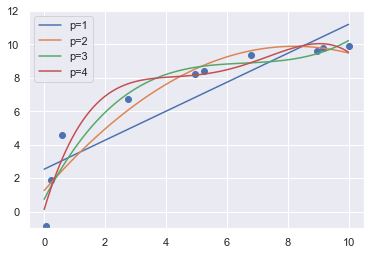

In [25]:
fit_plot([1,2,3,4], R2_tlist, R2_vlist)

#### How about polynomial of degree = 5, 6, 7, 8, 9?
- Watch $R^2_{train}$ and $R^2_{val}$

p = 5, train R^2=0.9871298825863527, test R^2=0.5581929074785783
p = 6, train R^2=0.9982499712478977, test R^2=0.7281675352302732
p = 7, train R^2=0.9986124949460079, test R^2=0.7665246641203288
p = 8, train R^2=0.9999034544571024, test R^2=0.7664646261141534
p = 9, train R^2=0.9999999999999423, test R^2=0.7980647859712867


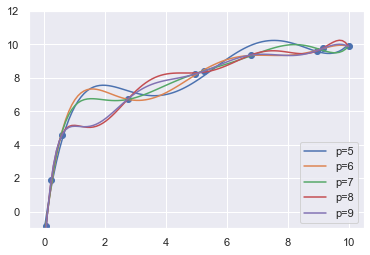

In [26]:
fit_plot([5,6,7,8,9], R2_tlist, R2_vlist)

### 4-3-4. Overfitting?

##### Change of $R^2$ as $p \uparrow$
- $p\uparrow$ : model complexity (_degree of polynomial_) increases
    - $R^2_{train}$ increases as $p\uparrow$
    - $R^2_{val}$ decreases as $p\uparrow$ (for larger $p$)
    *  <font color="red">TAQ</font>[<font color="white"> __overfit__ </font>] to training data
        * when model complexity is high
        * as compared to training data size
        * overfit model does _not generalize_ well to (unseen) test data

In [27]:
def plot_learning_curve(p, train_score=None, val_score=None):
    plt.xlabel('p')
    plt.ylabel('$R^2$')
    plt.ylim(0, 1.05)    
    if train_score is not None:
        plt.plot(p, train_score, label="$R^2_{train}$")
    if val_score is not None:
        plt.plot(p, val_score, label="$R^2_{val}$")
    plt.legend()

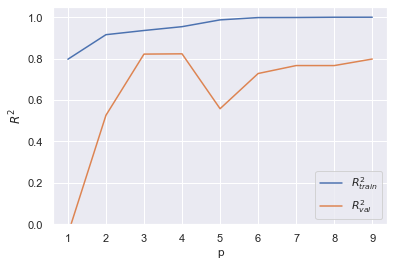

In [28]:
plot_learning_curve(range(1,len(R2_tlist)+1), R2_tlist, R2_vlist)

#### model error : MSE = <font color="red">TAQ</font>[<font color="white"> Bias$^2$ + Variance </font>]
* $\hat{y}$ : model prediction
* $y$ : true value
* $\bar{y} = \mathbb{E}_{\hat{y}}[\hat{y}]$ : expected prediction 
* MSE = $\mathbb{E}_{\hat{y}}[(y-\hat{y})^2]$ : expected squared error of prediction
    * $\mathbb{E}_{\hat{y}}[(y-\hat{y})^2]=\mathbb{E}_{\hat{y}}[(y-\bar{y}+\bar{y}-\hat{y})^2]$
        $=\mathbb{E}_{\hat{y}}[(y-\bar{y})^2]+\mathbb{E}_{\hat{y}}[(\bar{y}-\hat{y})^2]+2(y-\bar{y})\mathbb{E}_{\hat{y}}[\bar{y}-\hat{y}]$
        $=(y-\bar{y})^2+\mathbb{E}_{\hat{y}}[(\hat{y}-\bar{y})^2]$
* Bias$^2 = (y-\bar{y})^2$ : error in the expected prediction of the model
* Variance = $\mathbb{E}_{\hat{y}}[(\hat{y}-\bar{y})^2]$ : variance of prediction 
* best model = model with the smallest error (MSE) <br>
    $\cong$ model with highest validation score (dev. set score) 
    - model selection criteria AIC, BIC will be covered later

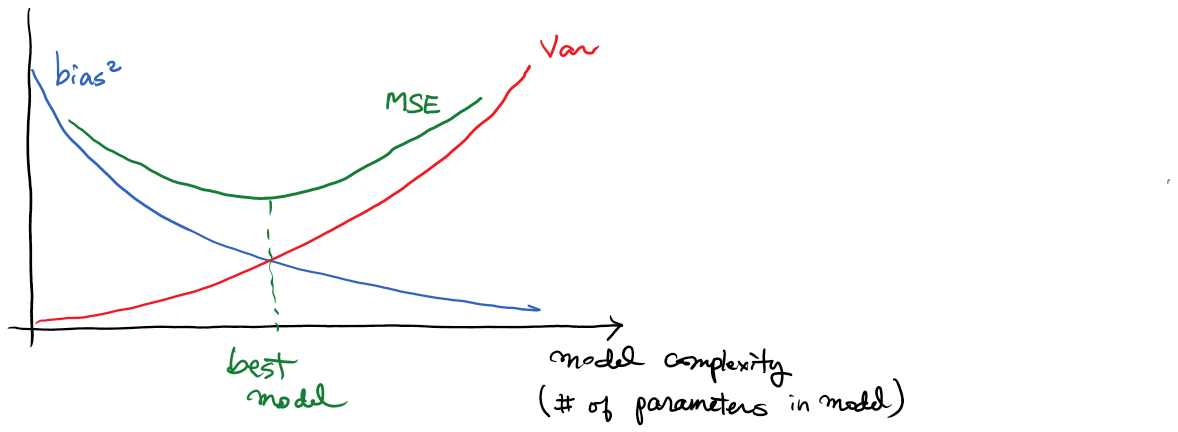

#### Overfit when model complexity is high
* schematic learning curve shows overfit
    * when model complexity is high
    * compared to training data set size  <br>
-
<img src=figures/05.03-validation-curve.png width=400>

#### Underfit when training data set is large
- A model of a given complexity will  
    - *overfit* a small dataset
        * the training score: relatively high, 
        * the validation score: relatively low.
    - *underfit* a large dataset
        * the training score will decrease
        * the validation score will increase

- training score > validation score in general

<img src=figures/05.03-learning-curve.png width=400>

In [29]:
X, Y = generate_data(500)
R2_tlist = []
R2_vlist = []
model = LinearRegression()
p = 9
model_pipe = make_pipeline(PolynomialFeatures(p), model)

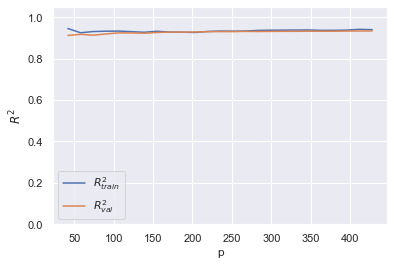

In [30]:
from sklearn.model_selection import learning_curve
t = np.linspace(0.1, 1, 25)
N, R2_train, R2_val = learning_curve(model_pipe, X, Y, cv=7, train_sizes=t)
R2_train_mean = R2_train.mean(axis=1)
R2_val_mean = R2_val.mean(axis=1)
plot_learning_curve (N, R2_train_mean, R2_val_mean)

### 4-4. Cross-validataion
- Splitting availale data 
    * $D_{train}=(X_{train}, Y_{train})$ : for fitting the model
    * $D_{val}=(X_{val}, Y_{val})$ : hold-out set of available data
    
- If available data set is large, we can set many validatation sets aside:
    * $D_{val_1} \to R^2_{val_1}$
    * $D_{val_2} \to R^2_{val_2}$
    * $D_{val_3} \to R^2_{val_3}$
    * then, combine them to get a better performance measure
        * $R^2_{val} = \frac{1}{3}\left(R^2_{val_1}+R^2_{val_2}+R^2_{val_3}\right)$

- If available data set is small, we should not waste valuable data:
    * use cross-validation
        * split availble data into n folds (groups) : $g_1, g_2, ..., g_n$
        * for each trial $i=1..n$
            * the rest groups (except $g_i$) for training $model_i$ 
            * compute the performance of $model_i$ using $g_i$ : $R^2_{i}$

<img src=figures/05.03-5-fold-CV.png width=500>

In [31]:
X, Y = generate_data(500)
model = LinearRegression()
p = 8
model_pipe = make_pipeline(PolynomialFeatures(p, include_bias=False), model)

In [32]:
from sklearn.model_selection import cross_val_score
s = cross_val_score(model_pipe, X, Y, cv=10)
print (f'R^2 mean = {s.mean()}, std = {s.std()}')

R^2 mean = 0.9115942175992237, std = 0.026627277468928665


### 4-5. Regularization
- fitting model may result in large coefficients $\mathbf{w}$
    * min $ L(\textbf{w}) = (Y-X\textbf{w})^2 $
- overfitting behavior
    * $R^2_{train}$ is large
    * $R^2_{val}$ is small (possibly negative)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import seaborn
seaborn.set(rc = {'figure.figsize':(5,4)})

In [34]:
def poly_fit_validate(model, p, X_t, Y_t, X_v, Y_v):
    poly = PolynomialFeatures(p, include_bias=False)
    model_pipe = make_pipeline(poly, model)
    model_pipe.fit(X_t, Y_t)
    print ("w0=", model.intercept_)
    print ("w=", model.coef_)
    
    R2_val = model_pipe.score(X_v, Y_v)
    print (f'val R^2={R2_val}')
    plt.scatter(X_t, Y_t)
    plot_model(model_pipe, f"p={p}")
    return model_pipe

w0= [174.69116625]
w= [[-4.89023865e+02  5.13033212e+02 -2.66725786e+02  7.74643840e+01
  -1.31306919e+01  1.28919779e+00 -6.79098125e-02  1.48471359e-03]]
val R^2=-57.656678086101095


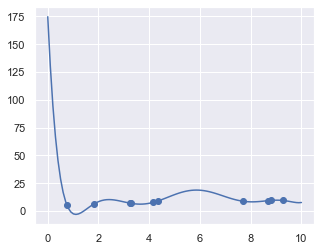

In [35]:
X_t, Y_t = generate_data(10)
X_v, Y_v = generate_data(10)
p = 8
model = LinearRegression()
model_pipe = poly_fit_validate(model, p, X_t, Y_t, X_v, Y_v);

### 4-5-1. Ridge regression : $L^2$ regularization 
* penalize large $\mathbf{w}$ to avoid overfitting
    * min $ L(\textbf{w}) = (Y-X\mathbf{w})^2 + \alpha\mathbf{w}^2$
- ridge regression model
    * $ \frac{\partial L}{\partial \mathbf{w}} = -2X^T(Y-X\mathbf{w}) + 2\alpha\mathbf{w} = 2X^TX\mathbf{w}-2X^TY + 2\alpha\mathbf{w}= 0 $
    * $ (X^TX+\alpha I)\mathbf{w}=X^TY$  
    * $ \mathbf{w} = (X^TX+\alpha I)^{-1}X^TY $
- `sklearn.linear_model.Ridge` implements this

w0= [5.69080762]
w= [[ 2.16915614e-02  3.15061875e-02  1.41245520e-02 -1.86192294e-02
   1.87434915e-02 -5.22586315e-03  5.60809520e-04 -2.08816357e-05]]
val R^2=0.6117723823730938


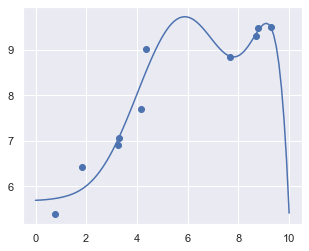

In [36]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=10.0)
poly_fit_validate(ridge, p, X_t, Y_t, X_v, Y_v);

### 4-5-2. Lasso regression : $L^1$ regularization 
* penalize large $\mathbf{w}$ to avoid overfitting
    * min $ L(\textbf{w}) = (Y-X\mathbf{w})^2 + \alpha|\mathbf{w}|$
- Lasso regression model
    * optimized by gradient descent
- `sklearn.linear_model.Lasso` implements this
- Lasso produces sparse model
    * some coefficients becomes 0

w0= [6.49498498]
w= [ 0.00000000e+00  0.00000000e+00  1.85546392e-02  0.00000000e+00
 -2.57525550e-04 -4.72678960e-06  5.58593309e-07  1.02755770e-07]
val R^2=0.45280644047497964


c:\users\hyshin\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6739180658418356, tolerance: 0.0019408343274221547
  model = cd_fast.enet_coordinate_descent(


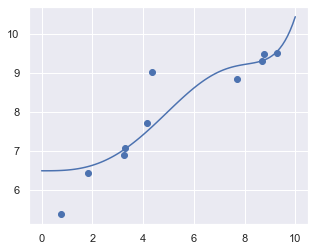

In [37]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=5.0)
poly_fit_validate(lasso, p, X_t, Y_t, X_v, Y_v);

### 4-5-3. Sparsity of Lasso

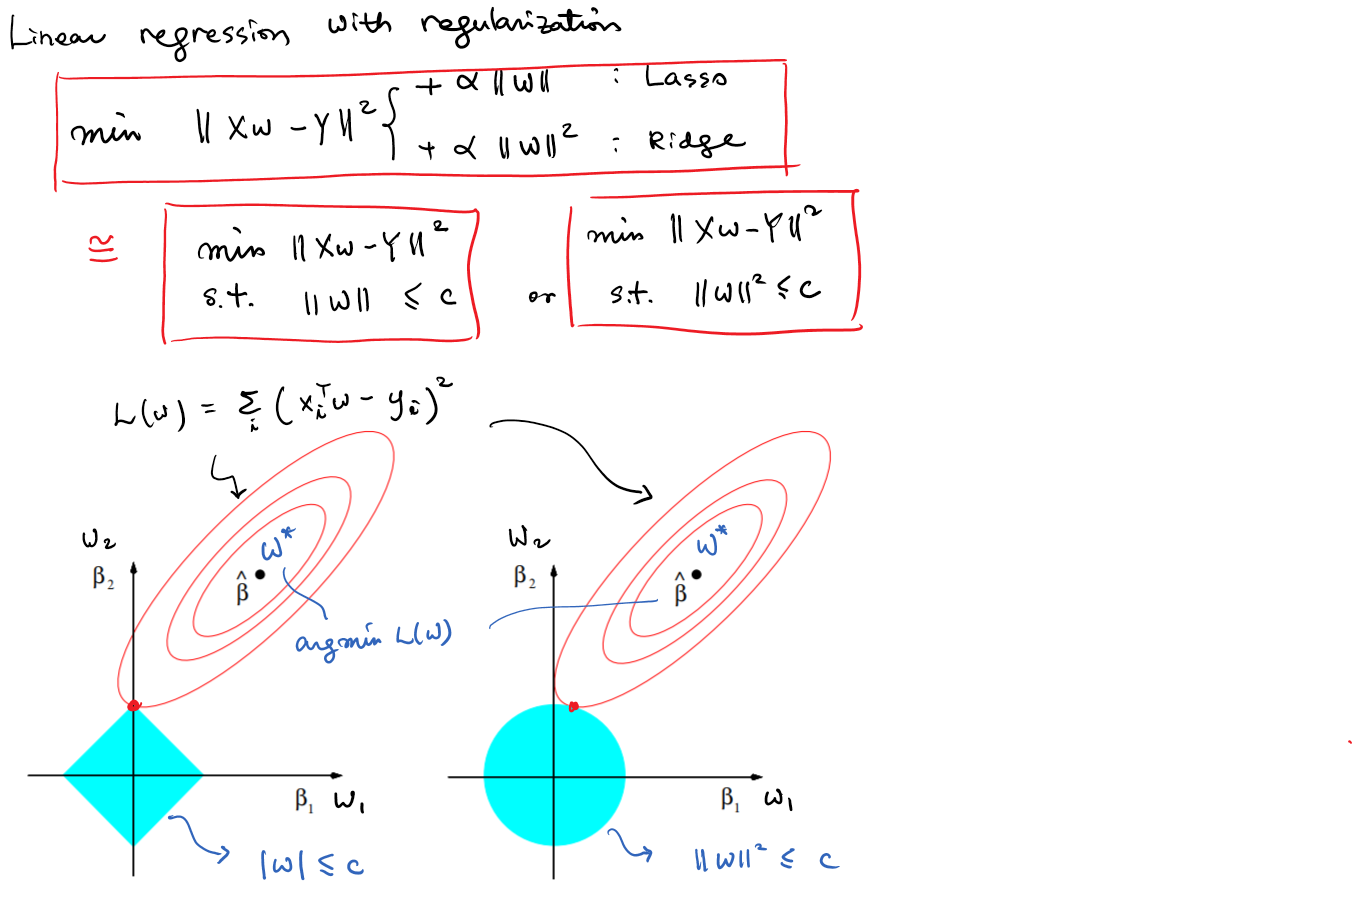

In [38]:
def regularizer(w, ridge=True):
    if ridge:
        return np.dot(w,w)
    else:
        return np.abs(w).sum()

In [39]:
def loss(w, X, Y):
    Xw = (X*w).sum(axis=1).reshape(Y.shape)
    e = ((Xw - Y)**2).mean()
    return e

In [40]:
import seaborn
seaborn.set(rc = {'figure.figsize':(12,4)})

def loss_contour(X, Y, alpha=0, ridge=True):
    n1 = 101
    w1 = np.linspace(-3, 3, n1)
    n2 = 101
    w2 = np.linspace(-3, 3, n2)
    z = np.zeros((n1,n2))
    r = np.zeros((n1,n2))
    for i in range(n1):
        for j in range(n2):
            w = np.array([w1[i], w2[j]])
            z[i,j] = loss(w, X, Y)
            if ridge:
                r[i,j] = np.dot(w,w)
            else:
                r[i,j] = np.abs(w).sum()
                
    plt.subplot(1,3,1)
    plt.contour(w1, w2, z, levels=[10, 20, 30, 50, 100, 200, 300, 400])
    plt.subplot(1,3,2)
    plt.contour(w1, w2, r, levels=[0.2, 0.6, 1, 2, 3, 4])
    plt.subplot(1,3,3)
    plt.contour(w1, w2, z, levels=[10, 20, 30, 50, 100, 200, 300, 400])
    plt.contour(w1, w2, r, levels=[0.2, 0.6, 1, 2, 3, 4], colors='blue')
    return z

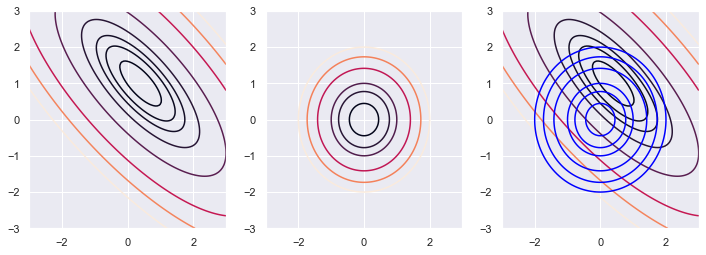

In [41]:
n = 1000
x, Y = generate_data(n)
x2,_ = generate_data(n)
X = np.concatenate([x, x2], axis=1)
loss_contour(X, Y, ridge=True);

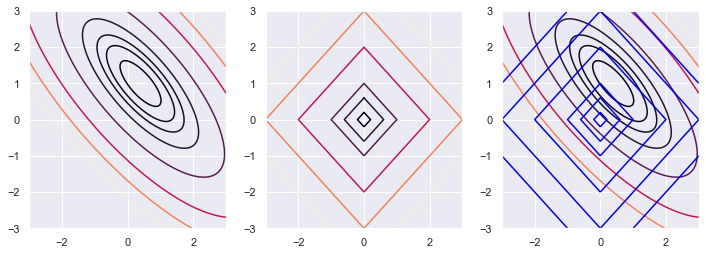

In [42]:
n = 1000
x, Y = generate_data(n)
x2,_ = generate_data(n)
X = np.concatenate([x, x2], axis=1)
loss_contour(X, Y, ridge=False);

### 4-5-4. elastic net : Ridge + Lasso
* min $ L(\textbf{w}) = (Y-X\mathbf{w})^2 + \alpha\left((1-\lambda)\mathbf{w}^2 + \lambda|\mathbf{w}|\right)$
* $\lambda$ : ratio of L1 penalty term

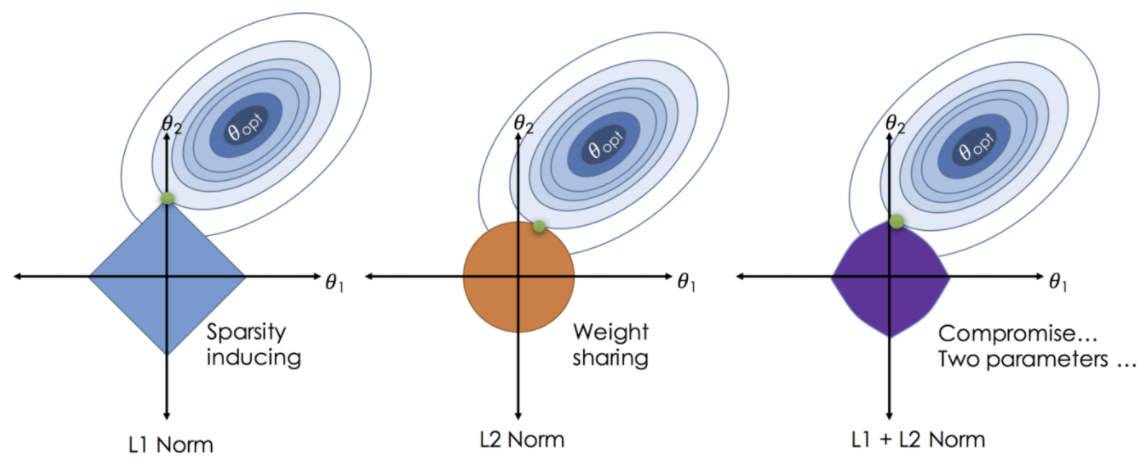

w0= [6.36035314]
w= [ 0.00000000e+00  0.00000000e+00  2.72784400e-02 -1.50374253e-03
 -2.30691373e-04 -2.34289190e-06  6.74982661e-07  1.07873108e-07]
val R^2=0.5020394579307953


c:\users\hyshin\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3258988992477843, tolerance: 0.0019408343274221547
  model = cd_fast.enet_coordinate_descent(


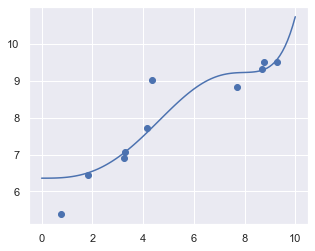

In [71]:
from sklearn.linear_model import ElasticNet
seaborn.set(rc = {'figure.figsize':(5,4)})
elnet = ElasticNet(alpha=5.0, l1_ratio=0.6)
poly_fit_validate(elnet, p, X_t, Y_t, X_v, Y_v);

### 4-6. Example: Predicting Bicycle Traffic

- bike traffic count of Seattle's Fremont Bridge

In [57]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.linear_model import LinearRegression

In [58]:
fbbc = pd.read_csv('data/FremontBridge.csv', index_col='Date', parse_dates=True)
fbbc.columns = ['Total', 'West', 'East']

<AxesSubplot:xlabel='Date'>

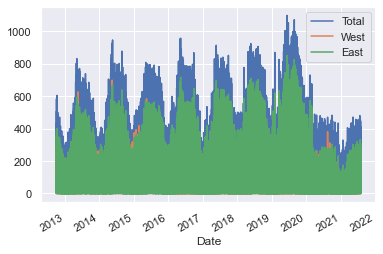

In [59]:
fbbc.plot()

##### traffic pattern since 2020 is different
- COVID-19 effect
- remove data since 2020.1.1

In [60]:
fbbc = fbbc[fbbc.index < "2020-01-01"]

Select 'Fremont Bridge Total' column and resample at daily freq.

In [61]:
daily = fbbc.resample('d').sum()
daily.drop(columns = ['West','East'], inplace=True)

#### weather of Seattle (obtained from weather station)
- NOAA [weather station data](http://www.ncdc.noaa.gov/cdo-web/search?datasetid=GHCND)
    * Seattle Tocoma Airport : station ID USW00024233
    * 2012.01.01 ~ 2021.09.17
- stored as SeattleWather2012-2021.csv

In [62]:
weather = pd.read_csv('data/SeattleWeather2012-2021.csv', index_col='DATE', parse_dates=True)
weather.head()

,STATION,NAME,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,...,WT04,WT05,WT08,WT09,WT13,WT14,WT16,WT17,WT18,WT22
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.51,NaN,NaN,0.00,0.0,0.0,NaN,55.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2012-01-02,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.07,NaN,NaN,0.43,0.0,0.0,NaN,51.0,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2012-01-03,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",5.14,NaN,NaN,0.03,0.0,0.0,NaN,53.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2012-01-04,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.51,NaN,NaN,0.80,0.0,0.0,NaN,54.0,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2012-01-05,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",13.65,NaN,NaN,0.05,0.0,0.0,NaN,48.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [63]:
# temperatures are in 1/10 deg C; convert to C
weather['Temp'] = (weather['TMIN'] + weather['TMAX'])/20  # degree(C)
weather['PRCPmm'] = weather['PRCP'] / 10
W = weather[['Temp', 'PRCPmm']]
print (W)
print (daily)

            Temp  PRCPmm
DATE                    
2012-01-01  4.80   0.000
2012-01-02  4.40   0.043
2012-01-03  4.90   0.003
2012-01-04  4.80   0.080
2012-01-05  4.25   0.005
...          ...     ...
2021-09-09  6.90   0.000
2021-09-10  6.20   0.000
2021-09-11  6.40   0.000
2021-09-12  6.15   0.002
2021-09-13   NaN     NaN

[3544 rows x 2 columns]
             Total
Date              
2012-10-03  7042.0
2012-10-04  6950.0
2012-10-05  6296.0
2012-10-06  4012.0
2012-10-07  4284.0
...            ...
2019-12-27  2276.0
2019-12-28  1676.0
2019-12-29  1846.0
2019-12-30  3606.0
2019-12-31  2284.0

[2646 rows x 1 columns]


In [64]:
XY = daily.join(W)
XY.dropna(inplace=True)
print(XY)

             Total  Temp  PRCPmm
Date                            
2012-10-03  7042.0  5.60   0.000
2012-10-04  6950.0  5.65   0.000
2012-10-05  6296.0  5.95   0.000
2012-10-06  4012.0  6.05   0.000
2012-10-07  4284.0  6.05   0.000
...            ...   ...     ...
2019-12-27  2276.0  4.10   0.001
2019-12-28  1676.0  4.40   0.000
2019-12-29  1846.0  4.55   0.001
2019-12-30  3606.0  4.55   0.004
2019-12-31  2284.0  4.95   0.026

[2646 rows x 3 columns]


#### 4-6-1. Attempt 1. Simple regression
- bike traffic vs temparature

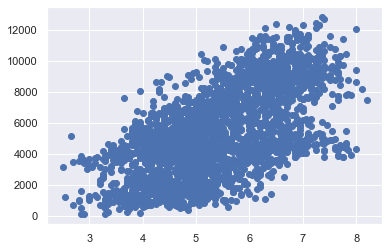

In [65]:
Y = XY['Total']
X = pd.DataFrame(XY['Temp'])  # X : 2-dim array
plt.scatter(X, Y)

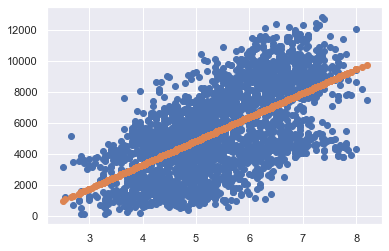

In [66]:
model = LinearRegression()
model.fit(X, Y)
Yhat = model.predict(X)
plt.scatter(X, Y)
plt.scatter(X, Yhat);

In [67]:
print (f"R^2 score = {model.score(X, Y):.3f}")

R^2 score = 0.376


In [68]:
def model_params(model, X):
    W = pd.Series(model.coef_, index=X.columns)
    W['w0'] = model.intercept_
    return W

model_params(model, X)

Temp    1544.258835
w0     -2896.820828
dtype: float64

#### 4-6-2. Attempt 2. Multiple linear regression
- $R^2$ is not so high $\to$ explanatory power of the simple linear model is too low
- Let's add weather features
    - bike traffic vs [temparature, precipitation]
    - bike traffic vs [temparature, precipitation, rain or not]

In [69]:
X =  XY[['Temp', 'PRCPmm']]
model.fit(X, Y)
print (f"R^2 score = {model.score(X, Y):.3f}")

R^2 score = 0.435


In [70]:
X['Dry'] = (X['PRCPmm'] == 0)
model.fit(X, Y)
print (f"R^2 score = {model.score(X, Y):.3f}")

R^2 score = 0.461


In [71]:
model_params(model, X)

Temp       1316.337129
PRCPmm   -15989.228232
Dry        1092.201233
w0        -2092.782134
dtype: float64

#### 4-6-3. Attempt 3. Multiple linear regression with categorical features
- Now, $R^2$ is a little higher, but not enough yet.
- We know that bike traffic patterns vary from day to day
- let's account for this by adding "day of week" to features
    * dow (day of week) as an integer : dow = 0(Mon), 1(Tue), ..., 6(Sun)
        * dow is actually a categorical var.
            * using integer to categorical var. is not a good idea
    * __dummy var.__ (a.k.a. indicator var) : binary variables
        * introduce 7 binary variables : mon, tue, wed, ...
        * 1-hot encoding : only one among those takes value 1, all others are 0

#### [Types of variables]
- __Cardinal__ (numerical) var. : magnitude matters
    * eg. temperature, precipitation
    * can take real or integer values
- __Categorical__ (nominal) var. : "name" of categories
    * eg. gender (M/F), day of week (Mon/Tue/Wed/..), ...
    * note that a caterigorical var. may also take integer values
        * eg. we can assign dow $\in$ {0, 1, 2, ..., 6}
- __Ordinal__ var. : order or grade
    * value of an ordinal var. means "order", not magnitude
    * eg. stages : infancy(1), childhood(2), adolescence(3), adulthood(4)

In [72]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    X[days[i]] = (X.index.dayofweek == i).astype(float)
X

,Temp,PRCPmm,Dry,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,,,
2012-10-03,5.60,0.000,True,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,5.65,0.000,True,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,5.95,0.000,True,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-06,6.05,0.000,True,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-07,6.05,0.000,True,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2019-12-27,4.10,0.001,False,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2019-12-28,4.40,0.000,True,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2019-12-29,4.55,0.001,False,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [73]:
model.fit(X, Y)
print (f"R^2 score = {model.score(X, Y):.3f}")

R^2 score = 0.798


In [74]:
model_params(model, X)

Temp       1305.398048
PRCPmm   -15892.570804
Dry        1078.394173
Mon         873.447847
Tue        1361.603028
Wed        1314.369870
Thu        1011.039726
Fri         375.310440
Sat       -2376.468456
Sun       -2559.302455
w0        -2026.684387
dtype: float64

#### 4-6-4. Attempt 4. Adding features (__Feature Engineering__)
- holidays?
- seasonality?
- growth pattern in time?

##### bike traffic in holiday is different
- holiday as a binary varible

In [75]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2021')
X = X.join(pd.Series(1, index=holidays, name='holiday'))
X['holiday'].fillna(0, inplace=True)

In [76]:
model.fit(X, Y)
print (f"R^2 score = {model.score(X, Y):.3f}")

R^2 score = 0.822


##### bike traffic shows strong seasonality
- more bikes are used during summer time
- let's introduce a feature mimicking the length of daylight
    * length of daylight $\propto \cos(\frac{2\pi t}{365.25}) +$ const
        * $t$ = days since summer solstice

In [77]:
from datetime import datetime
days = (X.index - datetime(2011, 6, 22)).days
cf = 2 * np.pi / 365.25
phi = days * cf
X['cos'] = np.cos(phi)

In [78]:
model.fit(X, Y)
print (f"R^2 score = {model.score(X, Y):.3f}")

R^2 score = 0.836


- Seasonality is apparent.
- Then, why is the effect of adding length of daylight so small?
    * <font color="red">TAQ</font>[<font color="white"> seasonality is already included in temperature </font>]

##### bike traffic has been growing over time
- bike traffice has been growing since 2012
- let's include a feature indicating time since 2012

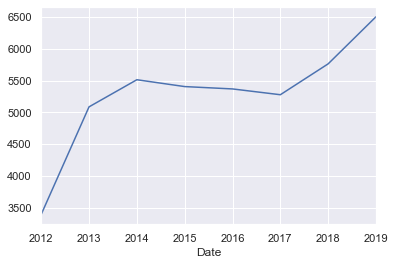

In [79]:
Y.resample('Y').mean().plot();

Finally, let's add a counter that increases from day 1, and measures how many years have passed.
This will let us measure any observed annual increase or decrease in daily crossings:

In [80]:
X['year'] = (X.index - X.index[0]).days / 365.25

In [81]:
model.fit(X, Y)
print (f"R^2 score = {model.score(X, Y):.3f}")

R^2 score = 0.851


#### 4-6-5. Final model and its validation performance
- now we have 13 features

In [82]:
print (f"R^2 score = {model.score(X, Y):.3f}")
W = model_params(model, X)
print(W)

R^2 score = 0.851
Temp         900.051143
PRCPmm    -13966.333524
Dry         1055.144588
Mon         1107.961734
Tue         1332.646076
Wed         1281.572058
Thu         1022.667211
Fri          344.977932
Sat        -2455.294155
Sun        -2634.530857
holiday    -2503.486340
cos          744.648892
year         162.210848
w0          -334.148507
dtype: float64


<AxesSubplot:xlabel='Date'>

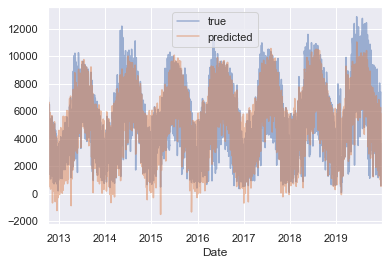

In [83]:
traffic = pd.DataFrame({'true' : Y})
traffic['predicted'] = model.predict(X)
traffic.plot(alpha=0.5)

In [93]:
from sklearn.model_selection import cross_val_score
def cross_val(model, X, Y):
    s = cross_val_score(model, X, Y, cv=10)
    print (f'R^2 mean = {s.mean():.3f}, std = {s.std():.3f}')

cross_val(model, X, Y)

R^2 mean = 0.825, std = 0.055


#### 4-6-6. Bootstrapping to check model uncertainty
- repeat : fit the model to half-size sample of the data (X,Y)
    * <font color="red">TAQ</font>[<font color="white">  __bootstrapping__  </font>]
- to check model uncertainty : std of the regression coefficients

In [9]:
from sklearn.utils import resample

def series(w, w0, names):
    s = pd.Series(w, index=names)
    s['w0'] = w0
    return s

def check_model_uncertainty(model, X, Y):
    model.fit(X, Y)
    print (f"Entire R^2 = {model.score(X, Y):.3f}")
    
    h = int(X.shape[0]/2)
    W_list = []
    W0_list = []
    for i in range(100):
        Xi, Yi = resample(X, Y, n_samples=h, replace=False)
        model.fit(Xi, Yi)
        W0_list.append(model.intercept_)
        W_list.append(model.coef_)

    w_mean = series(np.mean(W_list, axis=0).reshape(-1), np.mean(W0_list), X.columns)
    w_std = series(np.std(W_list, axis=0).reshape(-1), np.std(W0_list), X.columns)
    params = pd.DataFrame({'mean coef':w_mean, 'std':w_std})
    params['CoV(%)'] = params['std'] / np.abs(params['mean coef']) * 100
    print(params)

In [126]:
check_model_uncertainty(model, X, Y)

Entire R^2 = 0.851
            mean coef         std     CoV(%)
Temp       898.074894   31.564218   3.514653
PRCPmm  -14145.492425  887.170918   6.271757
Dry       1057.526726   52.349669   4.950198
Mon       1113.492297   58.574264   5.260410
Tue       1333.837109   50.489293   3.785267
Wed       1276.366535   50.908131   3.988520
Thu       1031.122802   50.644005   4.911540
Fri        337.283185   51.455734  15.255944
Sat      -2452.692933   47.335003   1.929920
Sun      -2639.408995   50.334812   1.907049
holiday  -2514.267364  235.818149   9.379199
cos        739.459353   45.554923   6.160572
year       164.093069   11.354648   6.919639
w0        -328.722483  177.480724  53.991051


##### interpretation of results
- temperature encourages bikes
- rain discourages bikes
- less bikes on weekends or holidays
- more bikes on summer days
- bikes are increasing over time

##### other potential features 
- non-linear effects of precipitation and cold temperature
- rain in the morning may be more important than rain in the afternoon or evening
- sunny days after streak of rainy days
- ...

#### Effect of adding redundant features
- introduce multi-colinearity
- makes model unstable
- so, avoid multi-colinearity if possible

- Consider the following model with redundant featuress $x$ and $2x$
    * $ y = w_0 + w_1x +  + w_22x+\epsilon $
    * $ y = w_0 + (w_1+2w_2)x + \epsilon $
    * there are (uncountably) many combinations of $(w_1, w_2)$ resulting in the same regression function 


In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso

w0 = [4.52452809], w = [[0.61565834]]


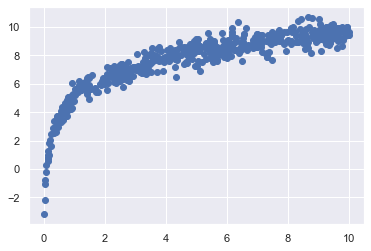

In [54]:
Xn, Yn = generate_data(500)
model = LinearRegression()
model.fit(Xn, Yn)
print (f"w0 = {model.intercept_}, w = {model.coef_}")

Xdf = pd.DataFrame(Xn, columns=['X'])
Ydf = pd.DataFrame(Yn, columns=['Y'])
plt.scatter(Xdf, Ydf);

In [55]:
model = LinearRegression()
check_model_uncertainty(model, Xdf, Ydf)

Entire R^2 = 0.712
    mean coef       std    CoV(%)
X    0.612967  0.024139  3.938053
w0   4.542640  0.151057  3.325320


In [56]:
Xdf['2X'] = 2*Xn
check_model_uncertainty(model, Xdf, Ydf)

Entire R^2 = 0.712
       mean coef           std       CoV(%)
X  -5.778697e+10  4.260068e+12  7372.021014
2X  2.889349e+10  2.130034e+12  7372.021014
w0  4.517418e+00  1.494007e-01     3.307215


In [ ]:
model = Ridge()
check_model_uncertainty(model, Xdf, Ydf)

In [ ]:
model = Lasso()
check_model_uncertainty(model, Xdf, Ydf)
w = model.coef_.reshape(-1)
print (f"\nw1={w[0]:.3f}, w2={w[1]:.3f}, w1+2w2 = {w[0]+2*w[1]:.3f}")